In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
# Add the project root (toy-wm directory) to sys.path so we can import src as a package
# This allows relative imports within the package to work correctly
# Assumes notebook is run from the project root directory
project_root = os.getcwd()  # or use: os.path.dirname(os.path.abspath(''))
print(project_root)
if project_root not in sys.path:
    sys.path.insert(0, project_root)

/share/u/wendler/code/toy-wm


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch as t

# Import using absolute path from src package
from src.utils.checkpoint import load_model_from_config

#model = load_model_from_config("configs/small_6frame.yaml")
model = load_model_from_config("configs/inference.yaml", strict=False)
model.eval()

loading configs/inference.yaml


CausalDit(
  (rope_seq): RoPE()
  (blocks): ModuleList(
    (0-7): 8 x CausalBlock(
      (norm1): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
      (selfattn): AttentionEinOps(
        (rope): RoPE()
        (ln1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (ln2): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
      )
      (norm2): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
      (geglu): GEGLU(
        (up_proj): Linear(in_features=384, out_features=1536, bias=True)
        (up_gate): Linear(in_features=384, out_features=1536, bias=True)
        (down): Linear(in_features=1536, out_features=384, bias=True)
        (nonlin): SiLU()
      )
      (modulation): Sequential(
        (0): SiLU()
        (1): Linear(in_features=384, out_features=2304, bias=True)
      )
    )
  )
  (patch): Patch(
    (init_conv_seq): Sequential(
      (0): Conv2d(3, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): SiLU()
      (2): GroupNorm(3

In [3]:
model.activate_caching(1, 300)

torch.Size([1, 19500, 1, 32]) torch.Size([1, 19500, 1, 32])
updating rope for block 0
torch.Size([1, 1950, 1, 32]) torch.Size([1, 1950, 1, 32])
torch.Size([1, 19500, 1, 32]) torch.Size([1, 19500, 1, 32])
updating rope for block 1
torch.Size([1, 1950, 1, 32]) torch.Size([1, 1950, 1, 32])
torch.Size([1, 19500, 1, 32]) torch.Size([1, 19500, 1, 32])
updating rope for block 2
torch.Size([1, 1950, 1, 32]) torch.Size([1, 1950, 1, 32])
torch.Size([1, 19500, 1, 32]) torch.Size([1, 19500, 1, 32])
updating rope for block 3
torch.Size([1, 1950, 1, 32]) torch.Size([1, 1950, 1, 32])
torch.Size([1, 19500, 1, 32]) torch.Size([1, 19500, 1, 32])
updating rope for block 4
torch.Size([1, 1950, 1, 32]) torch.Size([1, 1950, 1, 32])
torch.Size([1, 19500, 1, 32]) torch.Size([1, 19500, 1, 32])
updating rope for block 5
torch.Size([1, 1950, 1, 32]) torch.Size([1, 1950, 1, 32])
torch.Size([1, 19500, 1, 32]) torch.Size([1, 19500, 1, 32])
updating rope for block 6
torch.Size([1, 1950, 1, 32]) torch.Size([1, 1950, 

In [4]:
from src.datasets.pong1m import get_loader

loader, pred2frame = get_loader(duration=1, fps=30, mode='-1,1')
frames, actions = next(iter(loader))
frames = pred2frame(frames)

520 batches


In [5]:
from src.trainers.diffusion_forcing import sample

def render_video(actions, n_steps=8, cfg=0, negative_actions=None, clamp=True):
    model.cache.reset()
    device = model.device
    frames = t.randn(1, actions.shape[1], 3, 24, 24, device="cpu")
    for aidx in range(actions.shape[1]):
        print(aidx)
        noise = t.randn(1, 1, 3, 24, 24, device=device)
        z = sample(model, noise, actions[:, aidx:aidx+1], num_steps=n_steps, cfg=cfg, negative_actions=negative_actions)
        model.cache.update_global_location(1)
        frames[:, aidx:aidx+1] = z.detach().cpu()
        if clamp:
            frames = frames.clamp(-1, 1)
    return frames

In [6]:
#model = t.compile(model)

0


100%|██████████| 4/4 [00:00<00:00, 41.55it/s]


1


100%|██████████| 4/4 [00:00<00:00, 40.25it/s]


2


100%|██████████| 4/4 [00:00<00:00, 40.39it/s]


3


100%|██████████| 4/4 [00:00<00:00, 39.67it/s]


4


100%|██████████| 4/4 [00:00<00:00, 36.97it/s]


5


100%|██████████| 4/4 [00:00<00:00, 33.58it/s]


6


100%|██████████| 4/4 [00:00<00:00, 35.32it/s]


7


100%|██████████| 4/4 [00:00<00:00, 37.19it/s]


8


100%|██████████| 4/4 [00:00<00:00, 36.22it/s]


9


100%|██████████| 4/4 [00:00<00:00, 33.38it/s]


10


100%|██████████| 4/4 [00:00<00:00, 34.16it/s]


11


100%|██████████| 4/4 [00:00<00:00, 32.07it/s]


12


100%|██████████| 4/4 [00:00<00:00, 33.52it/s]


13


100%|██████████| 4/4 [00:00<00:00, 32.69it/s]


14


100%|██████████| 4/4 [00:00<00:00, 32.48it/s]


15


100%|██████████| 4/4 [00:00<00:00, 32.13it/s]


16


100%|██████████| 4/4 [00:00<00:00, 31.57it/s]


17


100%|██████████| 4/4 [00:00<00:00, 29.10it/s]


18


100%|██████████| 4/4 [00:00<00:00, 28.81it/s]


19


100%|██████████| 4/4 [00:00<00:00, 29.65it/s]


20


100%|██████████| 4/4 [00:00<00:00, 28.97it/s]


21


100%|██████████| 4/4 [00:00<00:00, 28.23it/s]


22


100%|██████████| 4/4 [00:00<00:00, 28.00it/s]


23


100%|██████████| 4/4 [00:00<00:00, 26.56it/s]


24


100%|██████████| 4/4 [00:00<00:00, 25.77it/s]


25


100%|██████████| 4/4 [00:00<00:00, 24.54it/s]


26


100%|██████████| 4/4 [00:00<00:00, 26.14it/s]


27


100%|██████████| 4/4 [00:00<00:00, 24.45it/s]


28


100%|██████████| 4/4 [00:00<00:00, 24.94it/s]


29


100%|██████████| 4/4 [00:00<00:00, 23.43it/s]


30


100%|██████████| 4/4 [00:00<00:00, 24.36it/s]


31


100%|██████████| 4/4 [00:00<00:00, 21.94it/s]


32


100%|██████████| 4/4 [00:00<00:00, 22.99it/s]


33


100%|██████████| 4/4 [00:00<00:00, 22.76it/s]


34


100%|██████████| 4/4 [00:00<00:00, 22.57it/s]


35


100%|██████████| 4/4 [00:00<00:00, 22.56it/s]


36


100%|██████████| 4/4 [00:00<00:00, 21.73it/s]


37


100%|██████████| 4/4 [00:00<00:00, 22.52it/s]


38


100%|██████████| 4/4 [00:00<00:00, 22.87it/s]


39


100%|██████████| 4/4 [00:00<00:00, 22.65it/s]


40


100%|██████████| 4/4 [00:00<00:00, 22.91it/s]


41


100%|██████████| 4/4 [00:00<00:00, 22.80it/s]


42


100%|██████████| 4/4 [00:00<00:00, 21.73it/s]


43


100%|██████████| 4/4 [00:00<00:00, 21.48it/s]


44


100%|██████████| 4/4 [00:00<00:00, 22.55it/s]


45


100%|██████████| 4/4 [00:00<00:00, 22.27it/s]


46


100%|██████████| 4/4 [00:00<00:00, 22.32it/s]


47


100%|██████████| 4/4 [00:00<00:00, 21.72it/s]


48


100%|██████████| 4/4 [00:00<00:00, 22.24it/s]


49


100%|██████████| 4/4 [00:00<00:00, 21.88it/s]


50


100%|██████████| 4/4 [00:00<00:00, 22.14it/s]


51


100%|██████████| 4/4 [00:00<00:00, 21.44it/s]


52


100%|██████████| 4/4 [00:00<00:00, 22.48it/s]


53


100%|██████████| 4/4 [00:00<00:00, 21.70it/s]


54


100%|██████████| 4/4 [00:00<00:00, 21.32it/s]


55


100%|██████████| 4/4 [00:00<00:00, 22.45it/s]


56


100%|██████████| 4/4 [00:00<00:00, 21.88it/s]


57


100%|██████████| 4/4 [00:00<00:00, 21.50it/s]


58


100%|██████████| 4/4 [00:00<00:00, 22.88it/s]


59


100%|██████████| 4/4 [00:00<00:00, 22.17it/s]


60


100%|██████████| 4/4 [00:00<00:00, 24.46it/s]


61


100%|██████████| 4/4 [00:00<00:00, 22.28it/s]


62


100%|██████████| 4/4 [00:00<00:00, 22.00it/s]


63


100%|██████████| 4/4 [00:00<00:00, 21.83it/s]


64


100%|██████████| 4/4 [00:00<00:00, 22.61it/s]


65


100%|██████████| 4/4 [00:00<00:00, 21.98it/s]


66


100%|██████████| 4/4 [00:00<00:00, 19.91it/s]


67


100%|██████████| 4/4 [00:00<00:00, 21.44it/s]


68


100%|██████████| 4/4 [00:00<00:00, 21.74it/s]


69


100%|██████████| 4/4 [00:00<00:00, 21.20it/s]


70


100%|██████████| 4/4 [00:00<00:00, 22.60it/s]


71


100%|██████████| 4/4 [00:00<00:00, 22.30it/s]


72


100%|██████████| 4/4 [00:00<00:00, 22.79it/s]


73


100%|██████████| 4/4 [00:00<00:00, 22.60it/s]


74


100%|██████████| 4/4 [00:00<00:00, 22.32it/s]


75


100%|██████████| 4/4 [00:00<00:00, 22.42it/s]


76


100%|██████████| 4/4 [00:00<00:00, 22.23it/s]


77


100%|██████████| 4/4 [00:00<00:00, 20.56it/s]


78


100%|██████████| 4/4 [00:00<00:00, 21.14it/s]


79


100%|██████████| 4/4 [00:00<00:00, 21.82it/s]


80


100%|██████████| 4/4 [00:00<00:00, 22.51it/s]


81


100%|██████████| 4/4 [00:00<00:00, 22.39it/s]


82


100%|██████████| 4/4 [00:00<00:00, 22.44it/s]


83


100%|██████████| 4/4 [00:00<00:00, 21.68it/s]


84


100%|██████████| 4/4 [00:00<00:00, 22.42it/s]


85


100%|██████████| 4/4 [00:00<00:00, 22.07it/s]


86


100%|██████████| 4/4 [00:00<00:00, 22.37it/s]


87


100%|██████████| 4/4 [00:00<00:00, 22.80it/s]


88


100%|██████████| 4/4 [00:00<00:00, 22.11it/s]


89


100%|██████████| 4/4 [00:00<00:00, 20.96it/s]


90


100%|██████████| 4/4 [00:00<00:00, 23.53it/s]


91


100%|██████████| 4/4 [00:00<00:00, 21.87it/s]


92


100%|██████████| 4/4 [00:00<00:00, 21.96it/s]


93


100%|██████████| 4/4 [00:00<00:00, 22.49it/s]


94


100%|██████████| 4/4 [00:00<00:00, 21.77it/s]


95


100%|██████████| 4/4 [00:00<00:00, 20.88it/s]


96


100%|██████████| 4/4 [00:00<00:00, 22.48it/s]


97


100%|██████████| 4/4 [00:00<00:00, 21.76it/s]


98


100%|██████████| 4/4 [00:00<00:00, 21.44it/s]


99


100%|██████████| 4/4 [00:00<00:00, 21.33it/s]


100


100%|██████████| 4/4 [00:00<00:00, 20.31it/s]


101


100%|██████████| 4/4 [00:00<00:00, 20.37it/s]


102


100%|██████████| 4/4 [00:00<00:00, 22.99it/s]


103


100%|██████████| 4/4 [00:00<00:00, 22.56it/s]


104


100%|██████████| 4/4 [00:00<00:00, 22.21it/s]


105


100%|██████████| 4/4 [00:00<00:00, 22.54it/s]


106


100%|██████████| 4/4 [00:00<00:00, 22.45it/s]


107


100%|██████████| 4/4 [00:00<00:00, 22.09it/s]


108


100%|██████████| 4/4 [00:00<00:00, 22.71it/s]


109


100%|██████████| 4/4 [00:00<00:00, 21.57it/s]


110


100%|██████████| 4/4 [00:00<00:00, 20.53it/s]


111


100%|██████████| 4/4 [00:00<00:00, 20.32it/s]


112


100%|██████████| 4/4 [00:00<00:00, 20.78it/s]


113


100%|██████████| 4/4 [00:00<00:00, 21.08it/s]


114


100%|██████████| 4/4 [00:00<00:00, 20.73it/s]


115


100%|██████████| 4/4 [00:00<00:00, 20.76it/s]


116


100%|██████████| 4/4 [00:00<00:00, 20.59it/s]


117


100%|██████████| 4/4 [00:00<00:00, 20.71it/s]


118


100%|██████████| 4/4 [00:00<00:00, 20.57it/s]


119


100%|██████████| 4/4 [00:00<00:00, 20.59it/s]


120


100%|██████████| 4/4 [00:00<00:00, 22.40it/s]


121


100%|██████████| 4/4 [00:00<00:00, 21.67it/s]


122


100%|██████████| 4/4 [00:00<00:00, 23.25it/s]


123


100%|██████████| 4/4 [00:00<00:00, 21.99it/s]


124


100%|██████████| 4/4 [00:00<00:00, 23.17it/s]


125


100%|██████████| 4/4 [00:00<00:00, 22.67it/s]


126


100%|██████████| 4/4 [00:00<00:00, 22.56it/s]


127


100%|██████████| 4/4 [00:00<00:00, 22.62it/s]


128


100%|██████████| 4/4 [00:00<00:00, 22.98it/s]


129


100%|██████████| 4/4 [00:00<00:00, 22.00it/s]


130


100%|██████████| 4/4 [00:00<00:00, 21.13it/s]


131


100%|██████████| 4/4 [00:00<00:00, 22.63it/s]


132


100%|██████████| 4/4 [00:00<00:00, 22.63it/s]


133


100%|██████████| 4/4 [00:00<00:00, 23.10it/s]


134


100%|██████████| 4/4 [00:00<00:00, 21.04it/s]


135


100%|██████████| 4/4 [00:00<00:00, 20.71it/s]


136


100%|██████████| 4/4 [00:00<00:00, 22.67it/s]


137


100%|██████████| 4/4 [00:00<00:00, 22.89it/s]


138


100%|██████████| 4/4 [00:00<00:00, 23.24it/s]


139


100%|██████████| 4/4 [00:00<00:00, 23.09it/s]


140


100%|██████████| 4/4 [00:00<00:00, 23.04it/s]


141


100%|██████████| 4/4 [00:00<00:00, 22.92it/s]


142


100%|██████████| 4/4 [00:00<00:00, 22.07it/s]


143


100%|██████████| 4/4 [00:00<00:00, 22.77it/s]


144


100%|██████████| 4/4 [00:00<00:00, 21.58it/s]


145


100%|██████████| 4/4 [00:00<00:00, 23.12it/s]


146


100%|██████████| 4/4 [00:00<00:00, 22.42it/s]


147


100%|██████████| 4/4 [00:00<00:00, 22.08it/s]


148


100%|██████████| 4/4 [00:00<00:00, 22.99it/s]


149


100%|██████████| 4/4 [00:00<00:00, 22.67it/s]


150


100%|██████████| 4/4 [00:00<00:00, 24.77it/s]


151


100%|██████████| 4/4 [00:00<00:00, 23.72it/s]


152


100%|██████████| 4/4 [00:00<00:00, 22.47it/s]


153


100%|██████████| 4/4 [00:00<00:00, 22.99it/s]


154


100%|██████████| 4/4 [00:00<00:00, 22.67it/s]


155


100%|██████████| 4/4 [00:00<00:00, 22.30it/s]


156


100%|██████████| 4/4 [00:00<00:00, 23.01it/s]


157


100%|██████████| 4/4 [00:00<00:00, 22.28it/s]


158


100%|██████████| 4/4 [00:00<00:00, 22.46it/s]


159


100%|██████████| 4/4 [00:00<00:00, 20.85it/s]


160


100%|██████████| 4/4 [00:00<00:00, 22.31it/s]


161


100%|██████████| 4/4 [00:00<00:00, 22.98it/s]


162


100%|██████████| 4/4 [00:00<00:00, 22.16it/s]


163


100%|██████████| 4/4 [00:00<00:00, 22.04it/s]


164


100%|██████████| 4/4 [00:00<00:00, 22.79it/s]


165


100%|██████████| 4/4 [00:00<00:00, 22.89it/s]


166


100%|██████████| 4/4 [00:00<00:00, 22.03it/s]


167


100%|██████████| 4/4 [00:00<00:00, 22.21it/s]


168


100%|██████████| 4/4 [00:00<00:00, 22.90it/s]


169


100%|██████████| 4/4 [00:00<00:00, 22.97it/s]


170


100%|██████████| 4/4 [00:00<00:00, 21.50it/s]


171


100%|██████████| 4/4 [00:00<00:00, 21.10it/s]


172


100%|██████████| 4/4 [00:00<00:00, 23.13it/s]


173


100%|██████████| 4/4 [00:00<00:00, 21.91it/s]


174


100%|██████████| 4/4 [00:00<00:00, 23.09it/s]


175


100%|██████████| 4/4 [00:00<00:00, 23.14it/s]


176


100%|██████████| 4/4 [00:00<00:00, 22.94it/s]


177


100%|██████████| 4/4 [00:00<00:00, 22.24it/s]


178


100%|██████████| 4/4 [00:00<00:00, 22.06it/s]


179


100%|██████████| 4/4 [00:00<00:00, 22.09it/s]


180


100%|██████████| 4/4 [00:00<00:00, 24.55it/s]


181


100%|██████████| 4/4 [00:00<00:00, 23.41it/s]


182


100%|██████████| 4/4 [00:00<00:00, 22.02it/s]


183


100%|██████████| 4/4 [00:00<00:00, 22.97it/s]


184


100%|██████████| 4/4 [00:00<00:00, 22.89it/s]


185


100%|██████████| 4/4 [00:00<00:00, 23.25it/s]


186


100%|██████████| 4/4 [00:00<00:00, 22.98it/s]


187


100%|██████████| 4/4 [00:00<00:00, 22.09it/s]


188


100%|██████████| 4/4 [00:00<00:00, 23.05it/s]


189


100%|██████████| 4/4 [00:00<00:00, 21.61it/s]


190


100%|██████████| 4/4 [00:00<00:00, 22.43it/s]


191


100%|██████████| 4/4 [00:00<00:00, 22.59it/s]


192


100%|██████████| 4/4 [00:00<00:00, 23.06it/s]


193


100%|██████████| 4/4 [00:00<00:00, 22.61it/s]


194


100%|██████████| 4/4 [00:00<00:00, 21.29it/s]


195


100%|██████████| 4/4 [00:00<00:00, 23.08it/s]


196


100%|██████████| 4/4 [00:00<00:00, 23.03it/s]


197


100%|██████████| 4/4 [00:00<00:00, 23.10it/s]


198


100%|██████████| 4/4 [00:00<00:00, 22.75it/s]


199


100%|██████████| 4/4 [00:00<00:00, 21.15it/s]


200


100%|██████████| 4/4 [00:00<00:00, 22.44it/s]


201


100%|██████████| 4/4 [00:00<00:00, 23.16it/s]


202


100%|██████████| 4/4 [00:00<00:00, 22.84it/s]


203


100%|██████████| 4/4 [00:00<00:00, 22.07it/s]


204


100%|██████████| 4/4 [00:00<00:00, 22.50it/s]


205


100%|██████████| 4/4 [00:00<00:00, 22.48it/s]


206


100%|██████████| 4/4 [00:00<00:00, 21.47it/s]


207


100%|██████████| 4/4 [00:00<00:00, 22.96it/s]


208


100%|██████████| 4/4 [00:00<00:00, 22.83it/s]


209


100%|██████████| 4/4 [00:00<00:00, 23.13it/s]


210


100%|██████████| 4/4 [00:00<00:00, 24.90it/s]


211


100%|██████████| 4/4 [00:00<00:00, 23.45it/s]


212


100%|██████████| 4/4 [00:00<00:00, 23.24it/s]


213


100%|██████████| 4/4 [00:00<00:00, 22.88it/s]


214


100%|██████████| 4/4 [00:00<00:00, 22.83it/s]


215


100%|██████████| 4/4 [00:00<00:00, 22.23it/s]


216


100%|██████████| 4/4 [00:00<00:00, 23.00it/s]


217


100%|██████████| 4/4 [00:00<00:00, 21.61it/s]


218


100%|██████████| 4/4 [00:00<00:00, 20.90it/s]


219


100%|██████████| 4/4 [00:00<00:00, 21.58it/s]


220


100%|██████████| 4/4 [00:00<00:00, 21.95it/s]


221


100%|██████████| 4/4 [00:00<00:00, 22.58it/s]


222


100%|██████████| 4/4 [00:00<00:00, 22.94it/s]


223


100%|██████████| 4/4 [00:00<00:00, 22.04it/s]


224


100%|██████████| 4/4 [00:00<00:00, 21.52it/s]


225


100%|██████████| 4/4 [00:00<00:00, 23.34it/s]


226


100%|██████████| 4/4 [00:00<00:00, 23.30it/s]


227


100%|██████████| 4/4 [00:00<00:00, 23.08it/s]


228


100%|██████████| 4/4 [00:00<00:00, 22.71it/s]


229


100%|██████████| 4/4 [00:00<00:00, 22.09it/s]


230


100%|██████████| 4/4 [00:00<00:00, 21.44it/s]


231


100%|██████████| 4/4 [00:00<00:00, 22.92it/s]


232


100%|██████████| 4/4 [00:00<00:00, 23.02it/s]


233


100%|██████████| 4/4 [00:00<00:00, 22.46it/s]


234


100%|██████████| 4/4 [00:00<00:00, 21.92it/s]


235


100%|██████████| 4/4 [00:00<00:00, 22.79it/s]


236


100%|██████████| 4/4 [00:00<00:00, 21.78it/s]


237


100%|██████████| 4/4 [00:00<00:00, 23.12it/s]


238


100%|██████████| 4/4 [00:00<00:00, 22.37it/s]


239


100%|██████████| 4/4 [00:00<00:00, 22.99it/s]


240


100%|██████████| 4/4 [00:00<00:00, 23.64it/s]


241


100%|██████████| 4/4 [00:00<00:00, 23.01it/s]


242


100%|██████████| 4/4 [00:00<00:00, 19.63it/s]


243


100%|██████████| 4/4 [00:00<00:00, 20.27it/s]


244


100%|██████████| 4/4 [00:00<00:00, 20.49it/s]


245


100%|██████████| 4/4 [00:00<00:00, 20.04it/s]


246


100%|██████████| 4/4 [00:00<00:00, 20.59it/s]


247


100%|██████████| 4/4 [00:00<00:00, 21.84it/s]


248


100%|██████████| 4/4 [00:00<00:00, 21.28it/s]


249


100%|██████████| 4/4 [00:00<00:00, 22.64it/s]


250


100%|██████████| 4/4 [00:00<00:00, 22.38it/s]


251


100%|██████████| 4/4 [00:00<00:00, 20.69it/s]


252


100%|██████████| 4/4 [00:00<00:00, 22.17it/s]


253


100%|██████████| 4/4 [00:00<00:00, 21.62it/s]


254


100%|██████████| 4/4 [00:00<00:00, 22.53it/s]


255


100%|██████████| 4/4 [00:00<00:00, 21.89it/s]


256


100%|██████████| 4/4 [00:00<00:00, 21.79it/s]


257


100%|██████████| 4/4 [00:00<00:00, 21.56it/s]


258


100%|██████████| 4/4 [00:00<00:00, 22.11it/s]


259


100%|██████████| 4/4 [00:00<00:00, 22.95it/s]


260


100%|██████████| 4/4 [00:00<00:00, 22.22it/s]


261


100%|██████████| 4/4 [00:00<00:00, 22.76it/s]


262


100%|██████████| 4/4 [00:00<00:00, 22.76it/s]


263


100%|██████████| 4/4 [00:00<00:00, 21.96it/s]


264


100%|██████████| 4/4 [00:00<00:00, 21.25it/s]


265


100%|██████████| 4/4 [00:00<00:00, 21.90it/s]


266


100%|██████████| 4/4 [00:00<00:00, 21.12it/s]


267


100%|██████████| 4/4 [00:00<00:00, 22.39it/s]


268


100%|██████████| 4/4 [00:00<00:00, 22.37it/s]


269


100%|██████████| 4/4 [00:00<00:00, 22.22it/s]


270


100%|██████████| 4/4 [00:00<00:00, 24.46it/s]


271


100%|██████████| 4/4 [00:00<00:00, 22.34it/s]


272


100%|██████████| 4/4 [00:00<00:00, 22.08it/s]


273


100%|██████████| 4/4 [00:00<00:00, 21.31it/s]


274


100%|██████████| 4/4 [00:00<00:00, 21.53it/s]


275


100%|██████████| 4/4 [00:00<00:00, 23.29it/s]


276


100%|██████████| 4/4 [00:00<00:00, 21.43it/s]


277


100%|██████████| 4/4 [00:00<00:00, 22.65it/s]


278


100%|██████████| 4/4 [00:00<00:00, 22.21it/s]


279


100%|██████████| 4/4 [00:00<00:00, 22.72it/s]


280


100%|██████████| 4/4 [00:00<00:00, 21.51it/s]


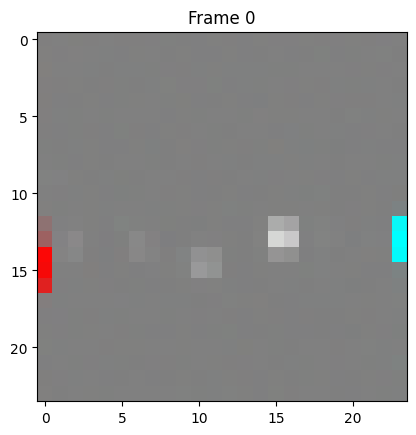

In [9]:
actions = t.tensor([[0]+40*[2]+20*[3]+30*[1]], dtype=t.int32, device=model.device)
actions = t.tensor([[0] + 200*[2] + 80*[3]], dtype=t.int32, device=model.device)
negative_actions = t.tensor([[0]+29*[2]], dtype=t.int32, device=model.device)
z = render_video(actions, n_steps=4, cfg=0, negative_actions=None, clamp=False)
frames = pred2frame(z)

import matplotlib.pyplot as plt
import matplotlib.animation as animation

# z[0] shape: (num_frames, height, width, 3), where num_frames = frames.shape[1]
frames_np = frames[0].permute(0, 2, 3, 1).cpu().numpy()  # shape: (num_frames, height, width, 3)

fig, ax = plt.subplots()
im = ax.imshow(frames_np[0])
ax.set_title('Frame 0')

def animate(i):
    im.set_data(frames_np[i])
    ax.set_title(f'Frame {i}')
    return [im]

ani = animation.FuncAnimation(
    fig, animate, frames=frames_np.shape[0],
    interval=200, blit=True, repeat=True
)

plt.show()

# Optional: To save the gif uncomment below (requires pillow, install with `pip install pillow`)
from collections import Counter
# Majority vote over values in actions for the filename
if actions is not None:
    # Flatten actions tensor and convert to list
    action_vals = actions.flatten().tolist()
    majority_val = Counter(action_vals).most_common(1)[0][0]
    ani.save(f"sample_{majority_val}.gif", writer="pillow")
else:
    ani.save("sample_unknown.gif", writer="pillow")




In [8]:
f"sample_{majority_val}.gif"

'sample_2.gif'